# 1  线性回归

## 一元线性回归

In [2]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd 

In [4]:
x=[154,157,158,159,160,161,162,163]
y=[155,156,159,162,161,164,165,166]
regr=linear_model.LinearRegression()
x=pd.DataFrame(x)
regr.fit(x.values.reshape(-1,1),y)
# 方法一
new_r=regr.predict([[167]]) # 修改预测值
# 方法二
# alpha=regr.intercept_ # 截距
# beta=regr.coef_ # 回归系数
# new_r=alpha+beta*np.array([167])
new_r

array([171.42016807])

In [5]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=.8)

# 2 数据清洗

## 删除

In [6]:
data=pd.read_csv("homework_3.csv")
# 删除nan 所在行
data1=data.dropna()
# 删除nan 所在列
data2=data.dropna(axis=1)

## 填补

In [7]:
# 用0填充缺省值
data3=data.fillna(0)
# 用上一个数据填充缺省值
data4=data.fillna(method="pad")
# 用平均值填充缺省值
data5=data.fillna(data.mean())

# 3 Pandas

## Series

In [8]:
# 创建 Series 对象
data = pd.Series([0.25, 0.5, 0.75, 1.0])
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
# Series 对象
population = pd.Series(population_dict)

## DataFrame

In [9]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
states = pd.DataFrame({'population': population,'area': area})

# 4 欧式距离

In [11]:
def Euclidean_Dist(X,Y):
    return math.sqrt(sum([(x-y)**2 for (x,y) in zip(X,Y)]))

# 5 KMeans

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

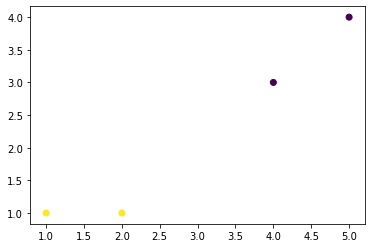

In [16]:
center=np.array([[1,1],[2,1]])
data=np.array([[1,1],[2,1],[4,3],[5,4]])

KMeansCluster = KMeans(n_clusters=2)
y2 = KMeansCluster.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], marker='o',c=y2)
plt.show()

# 6 KNN

## SKLearn

In [18]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
wine = pd.read_csv("wine.csv")

exam_Y=wine.pop("Class")
X_train,X_test,Y_train,Y_test = train_test_split(wine,exam_Y,train_size=.7)

In [20]:
# 数据归一
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.fit_transform(X_test)

In [21]:
estimator = KNeighborsClassifier()
estimator.fit(X_train,Y_train)
predict=estimator.predict(X_test)

In [22]:
estimator.score(X_test,Y_test)

0.9629629629629629

## 非 SKLearn

In [25]:
from numpy import *

dataSet = array([[1.0, 0.9], [1.0, 1.0], [0.1, 0.2], [0.0, 0.1]])
labels = ['A','A','B','B']
print(dataSet)
print(labels)

numSamples = dataSet.shape[0]
new_t = array([0.2,0.7]) # 新的样本点

diff = tile(new_t,(numSamples,1))-dataSet
squreDiff = diff**2
squreDist = sum(squreDiff, axis=1)
distance = squreDist ** 0.5
print(distance)

sortedDistIndices = argsort(distance)

print(sortedDistIndices)
classCount = {}
K = 4
for i in range(K):
    voteLabel = labels[sortedDistIndices[i]]
    print(voteLabel)
    classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
print(classCount)

maxCount = 0
for k, v in classCount.items():
    if v > maxCount:
        maxCount = v
        maxIndex = k

print("Your input is:", new_t, "and classified to class: ", maxIndex)

[[1.  0.9]
 [1.  1. ]
 [0.1 0.2]
 [0.  0.1]]
['A', 'A', 'B', 'B']
[0.82462113 0.85440037 0.50990195 0.63245553]
[2 3 0 1]
B
B
A
A
{'B': 2, 'A': 2}
Your input is: [0.2 0.7] and classified to class:  B


# 决策树

## SKLearn

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [32]:
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [34]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=3)
dt_model=DecisionTreeClassifier()
dt_model.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
predict_y=dt_model.predict(test_x)
score=dt_model.score(test_x,test_y)

## 自己实现

In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#计算给定数据集的香浓熵
from math import log

def Ent(dataset):
    n = len(dataset)
    label_counts = {}
    for item in dataset:
        label_current = item[-1]
        if label_current not in label_counts.keys():
            label_counts[label_current] = 0
        label_counts[label_current] += 1
    ent = 0.0
    for key in label_counts:
        prob = label_counts[key]/n
        ent -= prob * log(prob,2)
    return ent

#测试香浓熵计算函数
data = pd.read_csv('5_20_data1.csv')
Ent(data.iloc[:,-1])

1.0

In [37]:
#按照权重计算各分支的信息熵
def sum_weight(grouped,total_len):
    weight = len(grouped)/total_len
    return weight * Ent(grouped.iloc[:,-1])

#根据公式计算信息增益
def Gain(column, data):
    lenth = len(data)
    ent_sum = data.groupby(column).apply(lambda x:sum_weight(x,lenth)).sum() 
    ent_D = Ent(data.iloc[:,-1])
    return ent_D - ent_sum

#计算按照属性'收入'的信息增益
Gain('Salary', data)

0.20751874963942196

In [38]:
# 计算获取最大的信息增益的feature，输入data是一个dataframe，返回是一个字符串
def get_max_gain(data):
    max_gain = 0
    cols = data.columns[:-1]
    for col in cols:
        gain = Gain(col,data)
        if gain > max_gain:
            max_gain = gain
            max_label = col
    return max_label

#获取data中最多的类别作为节点分类，输入一个series，返回一个索引值，为字符串
def get_most_label(label_list):
    return label_list.value_counts().idxmax()

# 创建决策树，传入的是一个dataframe，最后一列为label
def TreeGenerate(data):
    feature = data.columns[:-1]
    label_list = data.iloc[:, -1]
    #如果样本全属于同一类别C，将此节点标记为C类叶节点
    if len(pd.unique(label_list)) == 1:
        return label_list.values[0]
    #如果待划分的属性集A为空，或者样本在属性A上取值相同，则把该节点作为叶节点，并标记为样本数最多的分类
    elif len(feature)==0 or len(data.loc[:,feature].drop_duplicates())==1:
        return get_most_label(label_list)
    #从A中选择最优划分属性
    best_attr = get_max_gain(data)
    tree = {best_attr: {}}
    #对于最优划分属性的每个属性值，生成一个分支
    for attr,gb_data in data.groupby(by=best_attr):
        if len(gb_data) == 0:
            tree[best_attr][attr] = get_most_label(label_list)
        else:
            #在data中去掉已划分的属性
            new_data = gb_data.drop(best_attr,axis=1)
            #递归构造决策树
            tree[best_attr][attr] = TreeGenerate(new_data)
    return tree

#得到经过训练后的决策树
mytree = TreeGenerate(data)
mytree

{'Age': {'30-40': 'Yes',
  '<30': 'No',
  '>40': {'Credit': {'Good': 'No', 'OK': 'Yes'}}}}

In [40]:
#使用递归函数进行分类
def tree_predict(tree, data):
    feature = list(tree.keys())[0]
    label = data[feature]
    next_tree = tree[feature][label]
    if type(next_tree) == str:
        return next_tree
    else:
        return tree_predict(next_tree, data)

x={'Age':36,'Salary':'H','STU':'No','Credit':'OK'}

if x['Age']<30:
    x['Age']='<30'
elif x['Age']>40:
    x['Age']='>40'
else:
    x['Age']='30-40'
y = tree_predict(mytree, x)
y

'Yes'

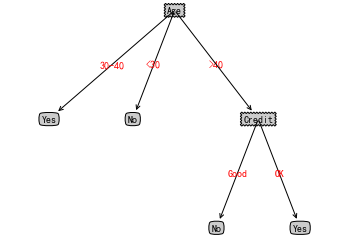

In [41]:
#为了matplotlib中文正常显示，指定字体为SimHei
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']='sans-serif'

# 获取树的叶子节点数目
def get_num_leafs(decision_tree):
    num_leafs = 0
    first_str = next(iter(decision_tree))
    second_dict = decision_tree[first_str]
    for k in second_dict.keys():
        if isinstance(second_dict[k], dict):
            num_leafs += get_num_leafs(second_dict[k])
        else:
            num_leafs += 1
    return num_leafs

# 获取树的深度
def get_tree_depth(decision_tree):
    max_depth = 0
    first_str = next(iter(decision_tree))
    second_dict = decision_tree[first_str]
    for k in second_dict.keys():
        if isinstance(second_dict[k], dict):
            this_depth = 1 + get_tree_depth(second_dict[k])
        else:
            this_depth = 1
        if this_depth > max_depth:
            max_depth = this_depth
    return max_depth

# 绘制节点
def plot_node(node_txt, center_pt, parent_pt, node_type):
    arrow_args = dict(arrowstyle='<-')
    create_plot.ax1.annotate(node_txt, xy=parent_pt,  xycoords='axes fraction', xytext=center_pt, textcoords='axes fraction', va="center", ha="center", bbox=node_type,arrowprops=arrow_args)

# 标注划分属性
def plot_mid_text(cntr_pt, parent_pt, txt_str):
    x_mid = (parent_pt[0] - cntr_pt[0]) / 2.0 + cntr_pt[0]
    y_mid = (parent_pt[1] - cntr_pt[1]) / 2.0 + cntr_pt[1]
    create_plot.ax1.text(x_mid, y_mid, txt_str, va="center", ha="center", color='red')

# 绘制决策树
def plot_tree(decision_tree, parent_pt, node_txt):
    d_node = dict(boxstyle="sawtooth", fc="0.8")
    leaf_node = dict(boxstyle="round4", fc='0.8')
    num_leafs = get_num_leafs(decision_tree)
    first_str = next(iter(decision_tree))
    cntr_pt = (plot_tree.xoff + (1.0 +float(num_leafs))/2.0/plot_tree.totalW, plot_tree.yoff)
    plot_mid_text(cntr_pt, parent_pt, node_txt)
    plot_node(first_str, cntr_pt, parent_pt, d_node)
    second_dict = decision_tree[first_str]
    plot_tree.yoff = plot_tree.yoff - 1.0/plot_tree.totalD
    for k in second_dict.keys():
        if isinstance(second_dict[k], dict):
            plot_tree(second_dict[k], cntr_pt, k)
        else:
            plot_tree.xoff = plot_tree.xoff + 1.0/plot_tree.totalW
            plot_node(second_dict[k], (plot_tree.xoff, plot_tree.yoff), cntr_pt, leaf_node)
            plot_mid_text((plot_tree.xoff, plot_tree.yoff), cntr_pt, k)
    plot_tree.yoff = plot_tree.yoff + 1.0/plot_tree.totalD

def create_plot(dtree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    create_plot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plot_tree.totalW = float(get_num_leafs(dtree))
    plot_tree.totalD = float(get_tree_depth(dtree))
    plot_tree.xoff = -0.5/plot_tree.totalW
    plot_tree.yoff = 1.0
    plot_tree(dtree, (0.5, 1.0), '')
    plt.show()

create_plot(mytree)

In [42]:
dataSet = [ [0, 0, 0, 0, 'no'],                        #数据集
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]
labels = ['年龄', '有工作', '有自己的房子', '信贷情况','label']  

In [43]:
df=pd.DataFrame(dataSet,columns=labels)

In [44]:
decisiontree = TreeGenerate(df)
decisiontree

{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}

# 关联规则

In [49]:
import random
import numpy as np

class Association_rules:
    def __init__(self,minSupport=0.4,minConfidence=0.5):
        '''
        minSuport:最小支持度
        minConfidence:最小置信度
        dataset:数据集
        count:存放frequent itemsets 以及 support
        associationRules:满足minConfidence的关联规则
        num:元素数量
        threshold = num*minSupport：由num和minSupport算出的阈值
        '''
        self.minSupport = minSupport
        self.minConfidence = minConfidence
        self.dataset = None
        self.count = None
        self.associationRules = None
        self.num = 0
        self.threshold = 0
 
    #计算frequent itemset
    def countItem(self,upDict,elength):
        currentDict = {}
        element = list(upDict.keys())
        for i in range(len(element)-1):
            for j in range(i+1,len(element)):
                tmp=set()
                if type(element[i])!=str:
                    for k in range(len(element[i])):
                        tmp.add(element[i][k])
                else:
                    tmp.add(element[i])
                if type(element[j])!=str:
                    for k in range(len(element[j])):
                        if element[j][k] not in tmp:
                            tmp.add(element[j][k])
                else:
                    if element[j] not in tmp:
                        tmp.add(element[j])
                if len(tmp) > elength:
                    continue
                if tmp in list(set(item) for item in currentDict.keys()):
                    continue
                for item in self.dataset:
                    if tmp.issubset(set(item)):
                        if tmp in list(set(item) for item in currentDict.keys()):
                            currentDict[tuple(tmp)] += 1
                        else:
                            currentDict[tuple(tmp)] = 1
                            
        for item in list(currentDict.keys()):
            if currentDict[item] < self.threshold:
                del currentDict[item]
        if len(list(currentDict.keys())) < 1:
            return None
        else:
            return currentDict
 
    #生成frequent itemsets
    def fit(self,dataset):
        self.dataset = dataset
        count = []
        count.append({})
        for item in self.dataset:
            for i in range(len(item)):
                if item[i] in list(count[0].keys()):
                    count[0][item[i]] += 1
                else:
                    count[0][item[i]] = 1
                    self.num += 1
 
        self.threshold = self.num * self.minSupport
 
        for item in list(count[0].keys()):
            if count[0][item] < self.threshold:
                del count[0][item]
                
        i = 0
        while(True):
            if len(count[i]) < 2:
                break
            else:
                tmp = self.countItem(count[i],i+2)
                if tmp == None:
                    break
                else:
                    count.append(tmp)
                i += 1
 
        self.count = count
 
    #打印并返回frequent itemsets
    def frequentItemsets(self):
        #print('threshold:',self.threshold)
        for item in self.count:
            print(item)
            print()
        return self.count
 
    #二进制法求每个itemset的所有子集
    def subsets(self,itemset):
        N = len(itemset)
        subsets = []
        for i in range(1,2**N-1):
            tmp = []
            for j in range(N):
                if (i >> j) % 2 == 1:
                    tmp.append(itemset[j])
            subsets.append(tmp)
        return subsets
 
    #计算置信度。set = (X),set2 = (X^Y)
    def countConfidence(self,set1,set2):
        len1 = len(set1)
        len2 = len(set2)
        #去除元素位置干扰。例如：set2 = ('a','b'),而self.count中存储为('b','a')
        if not tuple(set2) in self.count[len2-1].keys():
            set2[0],set[1] = set2[1],set2[0]
        #写代码的时候出现的疏忽，当元素只有一个时count中存储格式是str，而元素多于一个时格式是tuple
        if len1 == 1:
            return self.count[len2-1][tuple(set2)] / self.count[len1-1][set1[0]]
        else:
            if not tuple(set1) in self.count[len1-1].keys():
                set1[0],set1[1] = set1[1],set1[0]
            return self.count[len2-1][tuple(set2)] / self.count[len1-1][tuple(set1)] 
 
    def associationRule(self):
        associationRules = []
        for i in range(1,len(self.count)):
            for itemset in list(self.count[i].keys()):
                #用字典存每个itemset的关联规则
                tmp = {}
                #print(itemset)
                subset = self.subsets(itemset)
                #print(subset)
                for i in range(len(subset)-1):
                    for j in range(i+1,len(subset)):
                        #判断subset[i]与subset[j]完整组成一个itemset，而且没有相同的元素
                        if len(subset[i]) + len(subset[j]) == len(itemset) and len(set(subset[i]) & set(subset[j])) == 0:
                            confidence = self.countConfidence(subset[i],itemset)
                            #print(subset[i],' > ',subset[j],' ',confidence)
                            if confidence > self.minConfidence:
                                #生成相应键值对
                                tmpstr = str(subset[i]) + ' > ' + str(subset[j])
                                tmp[tmpstr] = confidence
                            #将subset[i]与subset[j]反过来生成另外一个规则
                            confidence = self.countConfidence(subset[j],itemset)
                            #print(subset[j],' > ',subset[i],' ',confidence)
                            if confidence > self.minConfidence:
                                tmpstr = str(subset[j]) + ' > ' + str(subset[i])
                                tmp[tmpstr] = confidence
                if tmp.keys():
                    associationRules.append(tmp)
        for item in associationRules:
            print(item)
        return associationRules


def set_data(num):
    dataset = []
    for i in range(num):
        number = random.randint(1,5)
        dataset.append(list(set(chr(ord('a')+random.randint(1,10)) for i in range(number))))
    return dataset

# if __name__ == '__main__':
#     num = 10
#     dataset = set_data(num)
#     for item in dataset:
#         print(item)
#     ar = Association_rules()
#     ar.fit(dataset)
#     freItemsets = ar.frequentItemsets()
#     associationRules = ar.associationRule()

In [50]:
dataset=[['milk','beer','diapers'],['bread','butter','milk'],['milk','diapers','cookies'],['bread','butter','biscuits'],['beer','cookies','diapers'],['milk','diapers','bread','butter'],['bread','butter','diapers'],['beer','diapers'],['milk','diapers','bread','butter'],['beer','cookies']]

In [51]:
ar = Association_rules(minSupport=0.4) # 调整支持度，置信度在上面第五行
ar.fit(dataset)
freItemsets = ar.frequentItemsets()
associationRules = ar.associationRule()

{'milk': 5, 'beer': 4, 'diapers': 7, 'bread': 5, 'butter': 5, 'cookies': 3}

{('diapers', 'milk'): 4, ('bread', 'milk'): 3, ('butter', 'milk'): 3, ('diapers', 'beer'): 3, ('diapers', 'bread'): 3, ('diapers', 'butter'): 3, ('bread', 'butter'): 5}

{('bread', 'butter', 'milk'): 3, ('diapers', 'bread', 'butter'): 3}

{"['diapers'] > ['milk']": 0.5714285714285714, "['milk'] > ['diapers']": 0.8}
{"['bread'] > ['milk']": 0.6, "['milk'] > ['bread']": 0.6}
{"['butter'] > ['milk']": 0.6, "['milk'] > ['butter']": 0.6}
{"['beer'] > ['diapers']": 0.75}
{"['bread'] > ['diapers']": 0.6}
{"['butter'] > ['diapers']": 0.6}
{"['bread'] > ['butter']": 1.0, "['butter'] > ['bread']": 1.0}
{"['bread'] > ['butter', 'milk']": 0.6, "['butter', 'milk'] > ['bread']": 1.0, "['butter'] > ['bread', 'milk']": 0.6, "['bread', 'milk'] > ['butter']": 1.0, "['bread', 'butter'] > ['milk']": 0.6, "['milk'] > ['bread', 'butter']": 0.6}
{"['bread', 'butter'] > ['diapers']": 0.6, "['bread'] > ['diapers', 'butter']": 0.6, "['